In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os

In [3]:
import h5py
import numpy as np
import pandas as pd
import json

In [4]:
f = h5py.File('/home/fernando/Documentos/ca1data20191017/sonata/edges/edges.h5', 'r') # 2.4 Gb not in github
f1 = h5py.File('../info/data-bbp/20191017/sonata/nodes/nodes.h5', 'r')
f2 = h5py.File('../info/gdrive/connhipp_mc2r100.h5', 'r')

## Nodes

In [5]:
number = 0
xmc2 = []
zmc2 = []
gidr100 = []

for gid,x in enumerate(f1['nodes']['hippocampus_neurons']['0']['x']):
    z = f1['nodes']['hippocampus_neurons']['0']['z'][gid]
    if (x-360)*(x-360)+(z-630)*(z-630) <= 100*100:
#         print(gid,x,z,region,f1['nodes']['hippocampus_neurons']['0']['@library']['mtype'][f1['nodes']['hippocampus_neurons']['0']['mtype'][gid]])   
        xmc2.append(x)
        zmc2.append(z)
        gidr100.append(gid)
        number+=1

(524.4081448397181, 744.4081448397181)

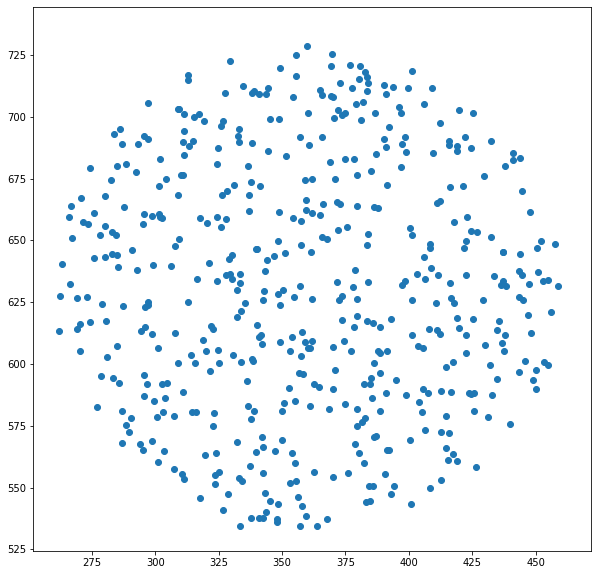

In [6]:
import matplotlib.pyplot as plt

figSize = (10,10)
fig = plt.figure(figsize=figSize)  # Open a new figure

plt.plot(xmc2,zmc2,'o')
plt.xlim(np.min(xmc2)-10,np.min(xmc2)+210)
plt.ylim(np.min(zmc2)-10,np.min(zmc2)+210)

## Edges

In [7]:
# number = 0
# imc2r100 = []
# for i,gidpost in enumerate(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['target_node_id']):
#     if gidpost in gidr100:
#         gidpre = f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['source_node_id'][i]
#         if gidpre in gidr100:
#             imc2r100.append(i)
#     #         print(gidpre,gidpost)
#             number+=1

# imc2r100 = list(f2['edges'])

In [8]:
#connhipp = {}
#connhipp['nodes'] = {}
#connhipp['nodes']['@library'] = {}
#connhipp['nodes']['dynamics_params'] = {}
#
#for itens in list(f1['nodes']['hippocampus_neurons']['0']['@library']):
#    connhipp['nodes']['@library'][itens] = []
#    for names in list(f1['nodes']['hippocampus_neurons']['0']['@library'][itens]):
#        name = str(names)
#        connhipp['nodes']['@library'][itens].append(name[2:-1])
##         print(itens,name[2:-1])
#
#connhipp['nodes']['dynamics_params']['holding_current'] = []
#connhipp['nodes']['dynamics_params']['threshold_current'] = []
#connhipp['nodes']['gid'] = []
#for itens in list(f1['nodes']['hippocampus_neurons']['0'])[2:]:
#    connhipp['nodes'][itens] = []
#    
#for i in gidr100:
#    connhipp['nodes']['dynamics_params']['holding_current'].append(f1['nodes']['hippocampus_neurons']['0']['dynamics_params']['holding_current'][i])
#    connhipp['nodes']['dynamics_params']['threshold_current'].append(f1['nodes']['hippocampus_neurons']['0']['dynamics_params']['threshold_current'][i])
#    connhipp['nodes']['gid'].append(i)
#    for itens in list(f1['nodes']['hippocampus_neurons']['0'])[2:]:
#        connhipp['nodes'][itens].append(f1['nodes']['hippocampus_neurons']['0'][itens][i])

In [9]:
mtypes = ['SLM_PPA','SO_BP','SO_BS','SO_OLM','SO_Tri','SP_AA','SP_BS','SP_CCKBC','SP_Ivy','SP_PC','SP_PVBC','SR_SCA']

In [10]:
#mtype = f1['nodes']['hippocampus_neurons']['0']['@library']['mtype'][f1['nodes']['hippocampus_neurons']['0']['mtype'][f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['source_node_id'][0]]]

In [11]:
#proj_mtypes = []
#source_mtypes = []
#target_mtypes = []
#
#for i in imc2r100:
#   source_id = f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['source_node_id'][i]
#   target_id = f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['target_node_id'][i]
#
#   pre_mtype = mtypes[f1['nodes']['hippocampus_neurons']['0']['mtype'][source_id]]
#   post_mtype = mtypes[f1['nodes']['hippocampus_neurons']['0']['mtype'][target_id]]
#
#   source_mtypes.append(pre_mtype)
#   target_mtypes.append(post_mtype)
#
#   proj_mtype = f'{pre_mtype}:{post_mtype}'
#   proj_mtypes.append(proj_mtype)

In [12]:
for itens in list(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']):
    print(itens,np.shape(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical'][itens]))

print('\n0')  
for itens in list(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['0']):
    print(itens,np.shape(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['0'][itens]))

print('\nindices[source_to_target]')  
for itens in list(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['indices']['source_to_target']):
    print(itens,np.shape(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['indices']['source_to_target'][itens]))
    
print('\nindices[target_to_source]')  
for itens in list(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['indices']['target_to_source']):
    print(itens,np.shape(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['indices']['target_to_source'][itens]))
  

0 (28,)
edge_type_id (19698045,)
indices (2,)
source_node_id (19698045,)
target_node_id (19698045,)

0
afferent_center_x (19698045,)
afferent_center_y (19698045,)
afferent_center_z (19698045,)
afferent_section_id (19698045,)
afferent_section_pos (19698045,)
afferent_section_pos_orig (19698045,)
afferent_section_type (19698045,)
afferent_segment_id (19698045,)
afferent_segment_offset (19698045,)
conductance (19698045,)
decay_time (19698045,)
delay (19698045,)
depression_time (19698045,)
efferent_section_id (19698045,)
efferent_section_pos (19698045,)
efferent_section_pos_orig (19698045,)
efferent_section_type (19698045,)
efferent_segment_id (19698045,)
efferent_segment_offset (19698045,)
efferent_surface_x (19698045,)
efferent_surface_y (19698045,)
efferent_surface_z (19698045,)
facilitation_time (19698045,)
n_rrp_vesicles (19698045,)
spine_length (19698045,)
syn_type_id (19698045,)
synapse_type_id (19698045,)
u_syn (19698045,)

indices[source_to_target]
node_id_to_ranges (18198, 2)
ran

4 [4.0 4.2] 6571 6571
5 [4.9 5.1] 837436 844007
6 [5.9 6.2] 6636012 7480019
7 [6.8 7.0] 310795 7790814
8 [7.9 8.1] 3676 7794490
13 [12.9 13.1] 1030882 8825372
14 [13.9 14.2] 130758 8956130
15 [14.8 15.0] 859951 9816081
16 [15.9 16.1] 2260037 12076118
17 [17.0 17.2] 148254 12224372
18 [17.8 18.0] 14967 12239339
19 [18.9 19.1] 1300 12240639
100 [99.9 100.1] 3553062 15793701
101 [101.0 101.2] 747808 16541509
102 [101.8 102.1] 317335 16858844
109 [109.0 109.2] 1245510 18104354
110 [109.8 110.1] 231571 18335925
111 [110.9 111.1] 274274 18610199
112 [111.8 112.0] 1087846 19698045


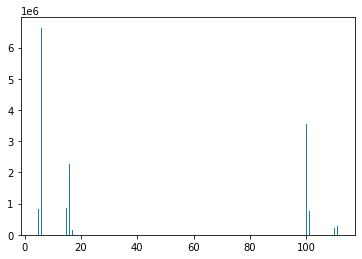

In [13]:
syn_type_id = np.array(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['0']['syn_type_id'])

histog = plt.hist(syn_type_id, bins=500)

listofsyntypes = []
synNumber = {}

number = 0
for i,y in enumerate(histog[0]):
    if y>0:
        number += y
        print('%d [%.1f %.1f] %d %d' % (int(histog[1][1+i]),histog[1][i],histog[1][1+i],y,number))
        listofsyntypes.append(int(histog[1][1+i]))
        synNumber[int(histog[1][1+i])] = int(y)

In [30]:
syns_mtypes = {}
for j in listofsyntypes:
    syns_mtypes[j] = []

for j in listofsyntypes:
    if synNumber[j] > 100000:
        maxconn = 100000
    else:
        maxconn = synNumber[j]
        
    print(j,maxconn,synNumber[j])

    for i in np.array([p for p in itertools.islice(list([np.where(syn_type_id==j)])[0][0], maxconn)]):
        source_id = f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['source_node_id'][i]
        target_id = f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['target_node_id'][i]

        pre_mtype = mtypes[f1['nodes']['hippocampus_neurons']['0']['mtype'][source_id]]
        post_mtype = mtypes[f1['nodes']['hippocampus_neurons']['0']['mtype'][target_id]]
        if pre_mtype + ':' + post_mtype not in syns_mtypes[j]:
            syns_mtypes[j].append(pre_mtype + ':' + post_mtype)

4 6571 6571
5 100000 837436
6 100000 6636012
7 100000 310795
8 3676 3676
13 100000 1030882
14 100000 130758
15 100000 859951
16 100000 2260037
17 100000 148254
18 14967 14967
19 1300 1300
100 100000 3553062
101 100000 747808
102 100000 317335
109 100000 1245510
110 100000 231571
111 100000 274274
112 100000 1087846


In [34]:
syns_mtypes_a = { 4: ['SLM_PPA:SP_PC'], 
5: ['SO_OLM:SP_PC', 'SO_Tri:SP_PC', 'SO_BS:SP_PC', 'SO_BP:SP_PC'],
6: ['SP_Ivy:SP_PC'],
7: ['SO_OLM:SLM_PPA', 'SO_BS:SLM_PPA', 'SR_SCA:SLM_PPA', 'SP_Ivy:SLM_PPA', 'SP_BS:SLM_PPA', 'SO_BP:SLM_PPA', 'SP_PVBC:SR_SCA', 'SP_CCKBC:SR_SCA', 'SP_BS:SR_SCA', 'SP_Ivy:SR_SCA', 'SO_OLM:SR_SCA', 'SO_Tri:SR_SCA', 'SO_BP:SR_SCA', 'SO_BS:SR_SCA', 'SLM_PPA:SR_SCA', 'SR_SCA:SP_PVBC', 'SP_CCKBC:SP_PVBC', 'SP_BS:SP_PVBC', 'SP_Ivy:SP_PVBC', 'SO_OLM:SP_PVBC', 'SO_BS:SP_PVBC', 'SO_Tri:SP_PVBC', 'SO_BP:SP_PVBC', 'SLM_PPA:SP_PVBC', 'SR_SCA:SP_CCKBC', 'SP_PVBC:SP_CCKBC', 'SP_BS:SP_CCKBC', 'SP_Ivy:SP_CCKBC', 'SO_OLM:SP_CCKBC', 'SO_Tri:SP_CCKBC', 'SO_BS:SP_CCKBC', 'SO_BP:SP_CCKBC', 'SLM_PPA:SP_CCKBC', 'SR_SCA:SP_BS', 'SP_PVBC:SP_BS', 'SP_CCKBC:SP_BS', 'SP_BS:SP_BS', 'SP_Ivy:SP_BS', 'SO_OLM:SP_BS', 'SO_BS:SP_BS', 'SO_Tri:SP_BS', 'SO_BP:SP_BS', 'SLM_PPA:SP_BS', 'SR_SCA:SP_AA', 'SP_CCKBC:SP_AA', 'SP_BS:SP_AA', 'SP_Ivy:SP_AA', 'SO_OLM:SP_AA', 'SO_BS:SP_AA', 'SO_Tri:SP_AA', 'SO_BP:SP_AA', 'SLM_PPA:SP_AA', 'SR_SCA:SP_Ivy', 'SP_PVBC:SP_Ivy', 'SP_CCKBC:SP_Ivy', 'SP_BS:SP_Ivy', 'SP_Ivy:SP_Ivy', 'SO_BS:SP_Ivy', 'SO_Tri:SP_Ivy', 'SO_OLM:SP_Ivy', 'SO_BP:SP_Ivy', 'SLM_PPA:SP_Ivy', 'SR_SCA:SO_OLM', 'SP_PVBC:SO_OLM', 'SP_CCKBC:SO_OLM', 'SP_BS:SO_OLM', 'SP_Ivy:SO_OLM', 'SO_BS:SO_OLM', 'SO_Tri:SO_OLM', 'SO_BP:SO_OLM', 'SO_OLM:SO_OLM', 'SR_SCA:SO_BS', 'SP_PVBC:SO_BS', 'SP_CCKBC:SO_BS', 'SP_BS:SO_BS', 'SP_Ivy:SO_BS', 'SO_BS:SO_BS', 'SO_Tri:SO_BS', 'SO_BP:SO_BS', 'SO_OLM:SO_BS', 'SR_SCA:SO_Tri', 'SP_PVBC:SO_Tri', 'SP_CCKBC:SO_Tri', 'SP_BS:SO_Tri', 'SP_Ivy:SO_Tri', 'SO_BS:SO_Tri', 'SO_Tri:SO_Tri', 'SO_OLM:SO_Tri', 'SO_BP:SO_Tri', 'SLM_PPA:SO_Tri', 'SR_SCA:SO_BP', 'SP_PVBC:SO_BP', 'SP_CCKBC:SO_BP', 'SP_BS:SO_BP', 'SP_Ivy:SO_BP', 'SO_OLM:SO_BP', 'SO_BS:SO_BP', 'SO_Tri:SO_BP', 'SO_BP:SO_BP', 'SLM_PPA:SO_BP'],
8: ['SLM_PPA:SLM_PPA', 'SR_SCA:SR_SCA', 'SP_CCKBC:SP_CCKBC'],
13: ['SP_PVBC:SP_PC'],
14: ['SP_AA:SP_PC'], 
15: ['SP_BS:SP_PC'], 
16: ['SP_CCKBC:SP_PC'], 
17: ['SR_SCA:SP_PC'],
18: ['SP_PVBC:SP_PVBC'], 
19: ['SP_PVBC:SP_AA'], 
100: ['SP_PC:SP_PC'],
101: ['SP_PC:SO_OLM', 'SP_PC:SO_BS', 'SP_PC:SO_Tri', 'SP_PC:SO_BP'],
102: ['SP_PC:SR_SCA', 'SP_PC:SP_AA'], 
109: ['SP_PC:SP_PVBC'],
110: ['SP_PC:SP_CCKBC'],
111: ['SP_PC:SP_BS'], 
112: ['SP_PC:SP_Ivy']}

# Synapses Per Connection

In [94]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

from bluepysnap import Circuit
from bluepysnap.bbp import Cell

In [95]:
circuit_path = '/home/fernando/Documentos/ca1data20191017/circuit_config.json'
circuit = Circuit(circuit_path)
cells = circuit.nodes["hippocampus_neurons"]
conn = circuit.edges["hippocampus_neurons__hippocampus_neurons__chemical"]

In [96]:
mtypes = cells.property_values(Cell.MTYPE)
model_mean = pd.DataFrame(index=mtypes, columns=mtypes, dtype=float)
model_std = pd.DataFrame(index=mtypes, columns=mtypes, dtype=float)

In [97]:
nsample = 10000
def sample_nsyn(pre, post):
    it = conn.iter_connections(pre, post, return_edge_count=True)
    return np.array([p[2] for p in itertools.islice(it, nsample)])

In [98]:
number = 0
unique_mtypes = []

for pre_mtype in mtypes:
    for post_mtype in mtypes:
        
        proj = '%s:%s' % (pre_mtype, post_mtype)
        
        data = sample_nsyn(
            pre={Cell.MTYPE: pre_mtype},
            post={Cell.MTYPE: post_mtype}#                 post={Cell.MTYPE: post_mtype, Cell.REGION: {'$regex': mcsss}}
        )
        if len(data) != 0:
            model_mean[post_mtype][pre_mtype] = data.mean()
            model_std[post_mtype][pre_mtype] = data.std()
            
            if proj not in unique_mtypes:
                unique_mtypes.append(proj)
                number+= 1

print(number)

127


In [100]:
model_mean

,SP_AA,SP_PC,SO_BS,SO_OLM,SP_BS,SP_PVBC,SR_SCA,SP_CCKBC,SP_Ivy,SLM_PPA,SO_BP,SO_Tri
SP_AA,NaN,7.116700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SP_PC,4.577300,1.286900,6.629100,2.917500,3.917600,4.918100,2.931300,3.031000,3.433900,NaN,3.188800,5.192500
SO_BS,1.591837,6.676600,1.166667,1.364486,2.183673,3.039387,1.486111,1.583333,2.649469,1.000000,1.263158,1.719298
SO_OLM,3.888889,10.953300,1.000000,1.230769,1.303797,3.741176,1.310345,3.874488,1.457746,4.533333,1.307692,1.250000
SP_BS,2.768150,6.398500,1.581081,1.852503,4.140592,4.662974,2.863830,1.846957,3.589277,1.000000,2.017544,3.168459
SP_PVBC,1.282051,11.609700,1.163265,1.292181,3.011673,2.777324,1.225746,1.239012,2.035203,NaN,1.241830,1.438119
SR_SCA,1.198020,5.309400,1.314286,1.217391,1.270936,1.339926,3.357143,1.177778,1.260154,1.000000,1.000000,1.229508
SP_CCKBC,1.669763,8.619600,1.400000,1.318182,4.985646,3.920752,1.434555,1.416558,3.258709,NaN,2.544118,2.797436
SP_Ivy,3.036281,13.919300,1.296970,1.306452,5.686432,6.384000,2.924528,2.797954,4.874500,1.000000,1.514066,3.578091
SLM_PPA,3.600000,3.982424,NaN,NaN,1.000000,2.680000,1.000000,2.857143,1.470588,2.000000,1.000000,1.000000


/home/fernando/anaconda3/envs/p37/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


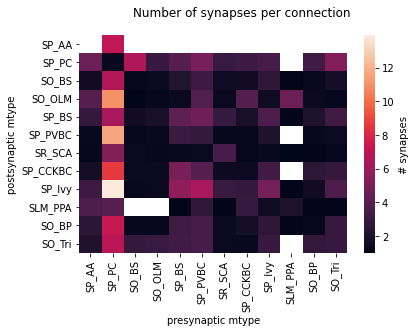

In [101]:
ax = seaborn.heatmap(model_mean)

fig = plt.gcf()
fig.suptitle('Number of synapses per connection', )

ax.set_xlabel('presynaptic mtype')
ax.set_ylabel('postsynaptic mtype')

ax.collections[0].colorbar.set_label("# synapses")

fig.show()

In [102]:
pre_mtypes = []
post_mtypes = []
for proj in unique_mtypes:
    split = proj.split(sep=':')
    pre_mtypes.append(split[0])
    post_mtypes.append(split[1])

In [104]:
synsPerConn = {}
synsPerConn['pre'] = pre_mtypes
synsPerConn['post'] = post_mtypes
synsPerConn['proj'] = unique_mtypes
synsPerConn['n_syns'] = []
for i,proj in enumerate(unique_mtypes):
    synsPerConn['n_syns'].append(model_mean[str(pre_mtypes[i])][str(post_mtypes[i])]) 

In [105]:
synsPerConn = pd.DataFrame(synsPerConn)
synsPerConn

,pre,post,proj,n_syns
0,SP_AA,SP_PC,SP_AA:SP_PC,4.577300
1,SP_PC,SP_AA,SP_PC:SP_AA,7.116700
2,SP_PC,SP_PC,SP_PC:SP_PC,1.286900
3,SP_PC,SO_BS,SP_PC:SO_BS,6.676600
4,SP_PC,SO_OLM,SP_PC:SO_OLM,10.953300
...,...,...,...,...
122,SO_Tri,SR_SCA,SO_Tri:SR_SCA,1.229508
123,SO_Tri,SP_CCKBC,SO_Tri:SP_CCKBC,2.797436
124,SO_Tri,SP_Ivy,SO_Tri:SP_Ivy,3.578091
125,SO_Tri,SO_BP,SO_Tri:SO_BP,2.875000


In [106]:
import seaborn as sns

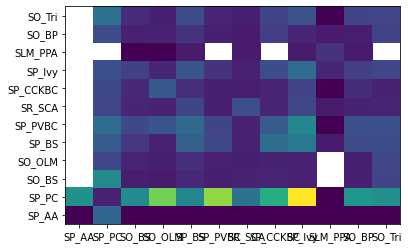

In [107]:
synsPerMtype = []
for pre in mtypes:
  line = []
  for post in mtypes:
    proj = '%s:%s' % (pre, post)
    if proj in unique_mtypes:
      line.append(float(synsPerConn[synsPerConn['proj']==proj]['n_syns']))
    else:
      line.append(0)
  synsPerMtype.append(line)

df = pd.DataFrame(synsPerMtype, index=mtypes, columns=mtypes)

plt.pcolor(df)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.show()

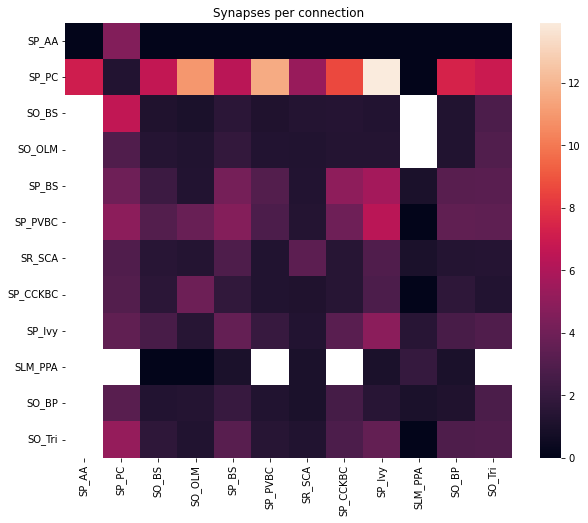

In [108]:
plt.figure(figsize=(10,8))
plt.title('Synapses per connection')
ax = sns.heatmap(df)

## Figures Mean and Std

In [134]:
conductance

[array([2.144013 , 2.144013 , 2.144013 , ..., 2.1386657, 1.8377395,
        1.8377395], dtype=float32)]

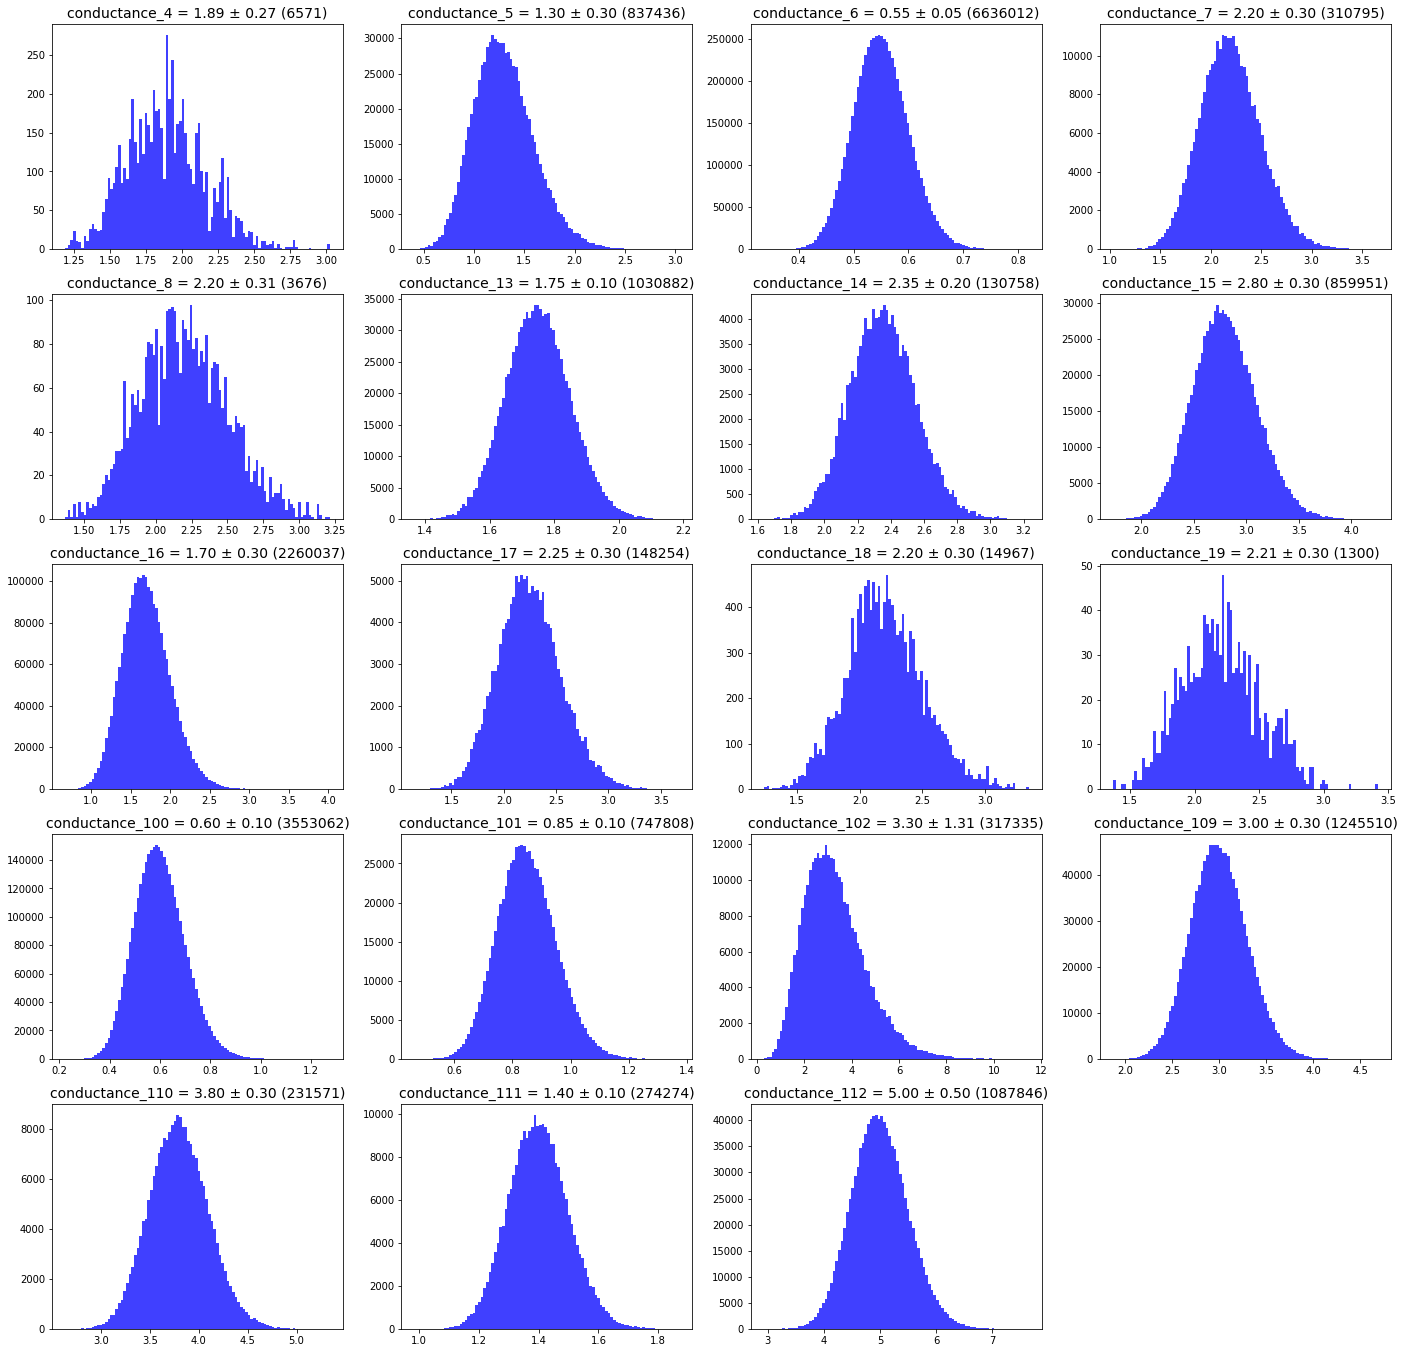

In [144]:
plt.figure(figsize=(24,24))

for i,synid in enumerate(listofsyntypes):
    
    parameter = 'conductance'
    # synid = 4

    conductance = []
    conductance.append(np.array(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['0'][parameter])[np.where(syn_type_id==synid)])
    conductance_mean = np.mean(np.array(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['0'][parameter])[np.where(syn_type_id==synid)])
    conductance_std =  np.std(np.array(f['edges']['hippocampus_neurons__hippocampus_neurons__chemical']['0'][parameter])[np.where(syn_type_id==synid)])

    plt.subplot(5, 4, 1+i) 
    histg = plt.hist(conductance, bins=100, facecolor='b', alpha=0.75)
#     plt.xlabel('g (nS)', fontsize=16)
#     plt.ylabel('#syns', fontsize=16)
    # plt.xlim(0, 2000)
    # plt.ylim(-100, 40)
    titlestr = '%s_%d = %.2f ± %.2f (%d)' % (parameter,synid,conductance_mean,conductance_std,np.size(conductance))
    plt.title(titlestr, fontsize=14)    

plt.savefig(parameter + '.png', facecolor = 'white', bbox_inches='tight' , dpi=300)

In [ ]:
conductance = []
conductance_std = []

for proj in unique_mtypes:
    conductance.append(np.mean(np.array(parameters['edges']['conductance'])[np.where(proj_mtypes==proj)[0]]))
    conductance_std.append(np.std(np.array(parameters['edges']['conductance'])[np.where(proj_mtypes==proj)[0]]))
    

In [ ]:
projs = np.unique(proj_mtypes)
proj_mtypes = np.array(proj_mtypes)

conductance = []
conductance_std = []

decay_time = []
decay_time_std = []

u_syn = []
u_syn_std = []

depression_time = []
depression_time_std = []

facilitation_time = []
facilitation_time_std = []

delay = []

n_rrp_vesicles = []


for proj in projs:
    conductance.append(np.mean(np.array(parameters['edges']['conductance'])[np.where(proj_mtypes==proj)[0]]))
    conductance_std.append(np.std(np.array(parameters['edges']['conductance'])[np.where(proj_mtypes==proj)[0]]))
    
    decay_time.append(np.mean(np.array(parameters['edges']['decay_time'])[np.where(proj_mtypes==proj)[0]]))
    decay_time_std.append(np.std(np.array(parameters['edges']['decay_time'])[np.where(proj_mtypes==proj)[0]]))

    u_syn.append(np.mean(np.array(parameters['edges']['u_syn'])[np.where(proj_mtypes==proj)[0]]))
    u_syn_std.append(np.std(np.array(parameters['edges']['u_syn'])[np.where(proj_mtypes==proj)[0]]))
    
    depression_time.append(np.mean(np.array(parameters['edges']['depression_time'])[np.where(proj_mtypes==proj)[0]]))
    depression_time_std.append(np.std(np.array(parameters['edges']['depression_time'])[np.where(proj_mtypes==proj)[0]]))

    facilitation_time.append(np.mean(np.array(parameters['edges']['facilitation_time'])[np.where(proj_mtypes==proj)[0]]))
    facilitation_time_std.append(np.std(np.array(parameters['edges']['facilitation_time'])[np.where(proj_mtypes==proj)[0]]))

    delay.append(np.mean(np.array(parameters['edges']['delay'])[np.where(proj_mtypes==proj)[0]]))

    n_rrp_vesicles.append(np.mean(np.array(parameters['edges']['n_rrp_vesicles'])[np.where(proj_mtypes==proj)[0]]))

## Netpyne

In [ ]:
pre = str(connCa1['edges']['source_node_id'][0])
post = str(connCa1['edges']['target_node_id'][0])
connNumber = 0
connList = {}
connList[connNumber] = []
connList[connNumber].append(str(connCa1['edges']['source_node_id'][0]))
connListpost = []
connListpost.append(str(connCa1['edges']['target_node_id'][0]))

for synID in range(1,133352):
  if pre == str(connCa1['edges']['source_node_id'][synID]) and post == str(connCa1['edges']['target_node_id'][synID]):
    connList[connNumber].append(str(connCa1['edges']['source_node_id'][synID]))
  else:
    connNumber+=1
    connList[connNumber] = []
    connList[connNumber].append(str(connCa1['edges']['source_node_id'][synID]))
    connListpost.append(str(connCa1['edges']['target_node_id'][synID]))

    if pre in Epops:
      netParams.synMechParams['synMech_' + pre + '_' + post] = {'mod': 'DetAMPANMDA', 
                                                'tau_d_AMPA':connCa1['edges']['decay_time'][synID],
                                                'Use': connCa1['edges']['u_syn'][synID], 
                                                'Dep': connCa1['edges']['depression_time'][synID], 
                                                'Fac': connCa1['edges']['facilitation_time'][synID]}

    else:
      netParams.synMechParams['synMech_' + pre + '_' + post]={'mod':'DetGABAAB', 
                                        'tau_d_GABAA':connCa1['edges']['decay_time'][synID],
                                        'Use': connCa1['edges']['u_syn'][synID], 
                                        'Dep': connCa1['edges']['depression_time'][synID], 
                                        'Fac': connCa1['edges']['facilitation_time'][synID]} 

  pre = str(connCa1['edges']['source_node_id'][synID])
  post = str(connCa1['edges']['target_node_id'][synID])

connNumber = 0
synID = 0

for connID in range(24647):
    pre = connList[connNumber][0]
    post = connListpost[connNumber]
        
    netParams.connParams['connID_' + pre + '_' + post] = {        
        'preConds': {'pop': pre},
        'postConds': {'pop': post},
        'synsPerConn': np.size(connList[connNumber]),
        'sec': connCa1['edges']['efferent_section_id'][synID:synID+np.size(connList[connNumber])], # se não der certo -> connCa1['edges']['efferent_section_id'][synID]
        'synMech': 'synMech_' + pre + '_' + post,
        'weight': connCa1['edges']['conductance'][synID:synID+np.size(connList[connNumber])],
        'delay': connCa1['edges']['delay'][synID:synID+np.size(connList[connNumber])]
        }
    connNumber+=1
    synID+=np.size(connList[connNumber])


for synID in range(133352):
    netParams.connParams['synID_' + str(synID)] = {
        
        pre = connCa1['edges']['source_node_id'][synID]
        post = connCa1['edges']['target_node_id'][synID]
        
        preMype = str(f1['nodes']['hippocampus_neurons']['0']['@library']['mtype'][f1['nodes']['hippocampus_neurons']['0']['mtype'][pre]])
        preMype = preMype[2:-1]        
        postMype = str(f1['nodes']['hippocampus_neurons']['0']['@library']['mtype'][f1['nodes']['hippocampus_neurons']['0']['mtype'][post]])
        postMype = postMype[2:-1]
        
        'preConds': {'pop': str(pre)},
        'postConds': {'pop': str(post)},
        'sec': connCa1['edges']['efferent_section_id'],
        'synsPerConn': 1,
        'synMech': matrix['synTape'][preMype][postMype],
        'weight': connCa1['edges']['conductance'],
        'delay': connCa1['edges']['delay']
        }